In [ ]:
import pylab
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Intrudction :
## Our data is about people's mindset behind the occurrence of Earthquakes in cities and towns.

### First, let's see the data : 

In [266]:
data_set = pd.read_csv('earthquake_data.csv') 
data_set.head()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?","Do you think the ""Big One"" will occur in your lifetime?",Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific
3,Not so worried,Not so worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",West South Central
4,Not so worried,Not so worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Extremely familiar,18 - 29,Male,"$200,000 and up",Middle Atlantic


In [ ]:
### Organize the data
- Treat missing values.
- removing all the columns that are not rellevant to our research.

### Let's check our NuN values : 


In [259]:
data_set.isnull().sum()

In general, how worried are you about earthquakes?                                                                                                       0
How worried are you about the Big One, a massive, catastrophic earthquake?                                                                               0
Do you think the "Big One" will occur in your lifetime?                                                                                                  0
Have you ever experienced an earthquake?                                                                                                                 7
Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?     7
How familiar are you with the San Andreas Fault line?                                                                                                   12
How familiar are you with the Yellowstone Supervolcano?               

#### Our data have 1013 rows, and we dont have a lot of NuN values, so we remove them.

In [260]:
data_set = data_set.dropna()

### There are few columns that we didn't rely on when we analyzed our data.
#### In the following code, we removing them. 

In [261]:
data_set = data_set.loc[:,['In general, how worried are you about earthquakes?','How worried are you about the Big One, a massive, catastrophic earthquake?','Have you ever experienced an earthquake?','Age','How much total combined money did all members of your HOUSEHOLD earn last year?','US Region']]
data_set.head()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Have you ever experienced an earthquake?,Age,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Not at all worried,Not so worried,"Yes, one or more minor ones",18 - 29,Prefer not to answer,New England
1,Somewhat worried,Very worried,"Yes, one or more minor ones",18 - 29,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,"Yes, one or more minor ones",18 - 29,"$10,000 to $24,999",Pacific
3,Not so worried,Not so worried,"Yes, one or more minor ones",18 - 29,"$25,000 to $49,999",West South Central
4,Not so worried,Not so worried,"Yes, one or more minor ones",18 - 29,"$200,000 and up",Middle Atlantic


## Now that we orginized the data, Let's analysis : 


### We wanted to see if there was a connection between the two questions 'In general, how worried are you about earthquakes?' and 'How worried are you about the Big One, a massive, catastrophic earthquake?' 

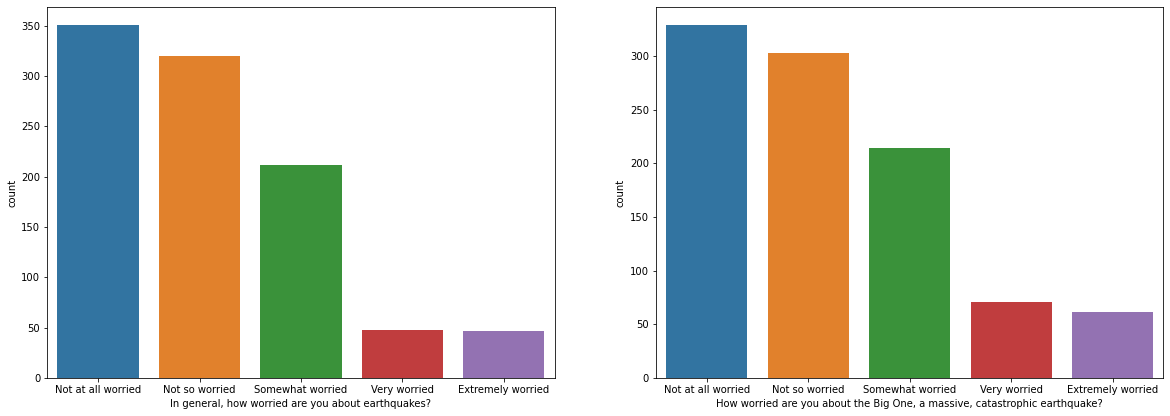

In [262]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x= 'In general, how worried are you about earthquakes?', data = data_set, order = data_set['In general, how worried are you about earthquakes?'].value_counts().index)
plt.subplot(2,2,2)
sns.countplot(x= 'How worried are you about the Big One, a massive, catastrophic earthquake?', data = data_set, order = data_set['How worried are you about the Big One, a massive, catastrophic earthquake?'].value_counts().index)

### The following charts displays the connection between the two levels/kinds of fear.
### According to that connection , from now on we will use mostly the "fear in general" question.


## YALLA lets start : 

### 1. The first thing that we'll going to analysis is if the age is affecting the fear of earthquakes :  

#### first we used "get_dummies" and "groupby" functions to split that "Age" Values to binary column, and to group by them.

In [263]:
x_data = pd.get_dummies(data=data_set, columns=['Age'])
x_data = x_data.groupby('In general, how worried are you about earthquakes?')[['Age_18 - 29','Age_30 - 44','Age_45 - 59','Age_60']].sum()

#### Here we made some pie charts for us to analysis : 

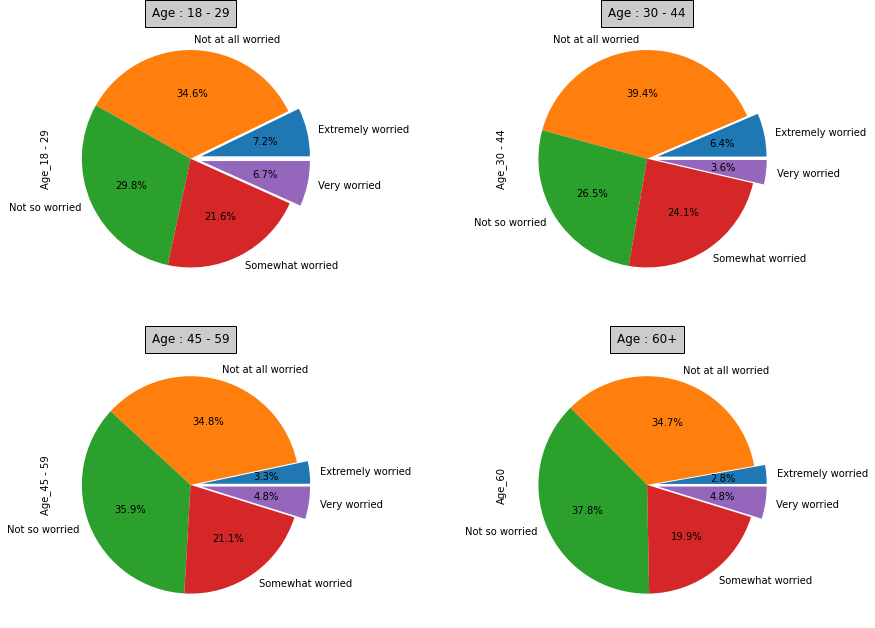

In [264]:
plt.figure(figsize=(15,11))
explode = (0.1, 0, 0, 0, 0.1)
plt.subplot(2,2,1)
plt.title("Age : 18 - 29",bbox={'facecolor':'0.8', 'pad':7})
x_data['Age_18 - 29'].plot.pie(autopct='%1.1f%%',explode = explode)
plt.subplot(2,2,2)
plt.title("Age : 30 - 44",bbox={'facecolor':'0.8', 'pad':7})
x_data['Age_30 - 44'].plot.pie(autopct='%1.1f%%',explode = explode)
plt.subplot(2,2,3)
plt.title("Age : 45 - 59",bbox={'facecolor':'0.8', 'pad':7})
x_data['Age_45 - 59'].plot.pie(autopct='%1.1f%%',explode = explode)
plt.subplot(2,2,4)
plt.title("Age : 60+",bbox={'facecolor':'0.8', 'pad':7})
x_data['Age_60'].plot.pie(autopct='%1.1f%%',explode = explode)

## In conclusion : 
### We can see the age does matter, the older you are, the fearless of earthqueakes you become! 

### - US regions map. 

In [239]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://united-states.reaproject.org/img/maps/Census_Divisions_Full.png",width=600, height=600)
#https://united-states.reaproject.org/

### 2. Let's see if there is a connection between the fear and regions :

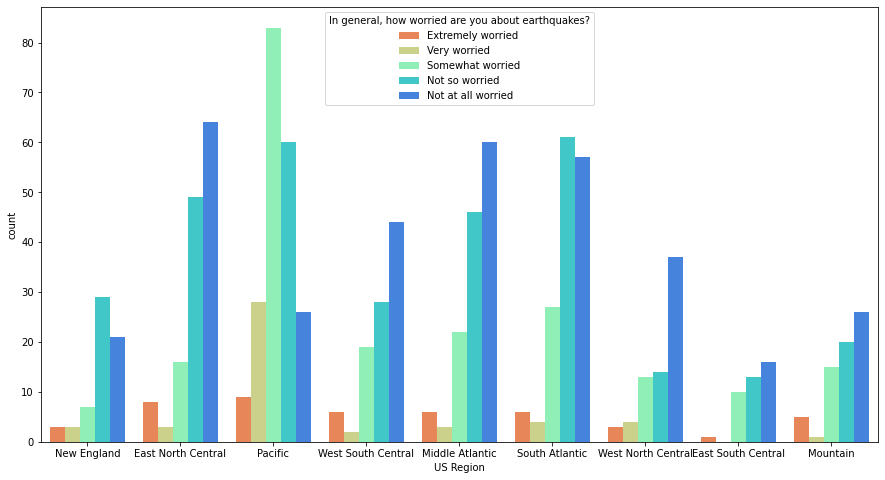

In [247]:
plt.figure(figsize = (15, 8))
sns.countplot(x="US Region", hue='In general, how worried are you about earthquakes?', data=data_set, palette="rainbow_r", hue_order= ['Extremely worried','Very worried','Somewhat worried','Not so worried','Not at all worried'])

### We can see the fear in the pacific is the highest, why? 

### Let's see if other columns can give us information about the pacific compare to the other regions.
#### The following chart is the amount of expirence with earthquakes in each region : 

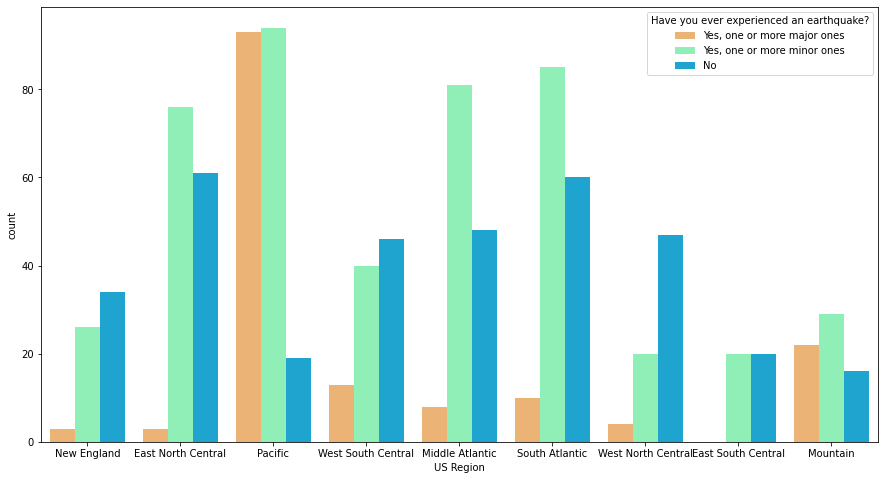

In [248]:
plt.figure(figsize = (15, 8))
sns.countplot(x="US Region", hue="Have you ever experienced an earthquake?", data=data_set, palette="rainbow_r",hue_order = ['Yes, one or more major ones','Yes, one or more minor ones','No'])

## The conclosion is clear! 
### In places that expirenced more earthquakes, there is more people that fear from them.

### - The pacific sounds quite terrifing for earthquakes, let's have a little look at USA earthquakes hot spots: 

In [249]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/images/sn-seismicH.jpg?itok=ft_cAqGT",width=700, height=700)

## If people are afraid in the pacific, and experienced earthquakes in the pacific, what makes them stay? 

### 3.the question makes us wonder, is it about the money? like everthing else?  

#### Counting the people household earnings : 

In [252]:
data_set['People_index']=  data_set.index
data_set.groupby('How much total combined money did all members of your HOUSEHOLD earn last year?')[['People_index']].count()

,People_index
How much total combined money did all members of your HOUSEHOLD earn last year?,
"$0 to $9,999",63
"$10,000 to $24,999",83
"$100,000 to $124,999",74
"$125,000 to $149,999",44
"$150,000 to $174,999",33
"$175,000 to $199,999",12
"$200,000 and up",50
"$25,000 to $49,999",158
"$50,000 to $74,999",174


#### The "Prefer not to answer" value can be problematic, so we decided to remove them : 

In [253]:
wanted_val= data_set[data_set['How much total combined money did all members of your HOUSEHOLD earn last year?']=="Prefer not to answer"].index
data_set.drop(wanted_val, inplace=True)
data_set.groupby('How much total combined money did all members of your HOUSEHOLD earn last year?')[['People_index']].count()

,People_index
How much total combined money did all members of your HOUSEHOLD earn last year?,
"$0 to $9,999",63
"$10,000 to $24,999",83
"$100,000 to $124,999",74
"$125,000 to $149,999",44
"$150,000 to $174,999",33
"$175,000 to $199,999",12
"$200,000 and up",50
"$25,000 to $49,999",158
"$50,000 to $74,999",174


#### We can change the values to categories so we can use them more easily : 

In [254]:
data_set['How much total combined money did all members of your HOUSEHOLD earn last year?'] = data_set['How much total combined money did all members of your HOUSEHOLD earn last year?'].astype('category').cat.codes
data_set.groupby('How much total combined money did all members of your HOUSEHOLD earn last year?')[['People_index']].count()

,People_index
How much total combined money did all members of your HOUSEHOLD earn last year?,
0,63
1,83
2,74
3,44
4,33
5,12
6,50
7,158
8,174


#### Editing the order of the categories values : 

In [255]:
change_values = {0:1,1:2,2:6,3:7,4:8,5:9,6:10,7:3,8:4,9:5}
data_set['How much total combined money did all members of your HOUSEHOLD earn last year?'].replace(change_values, inplace=True)

### Finally we can show the boxplot we wanted : 

(0.0, 11.0)

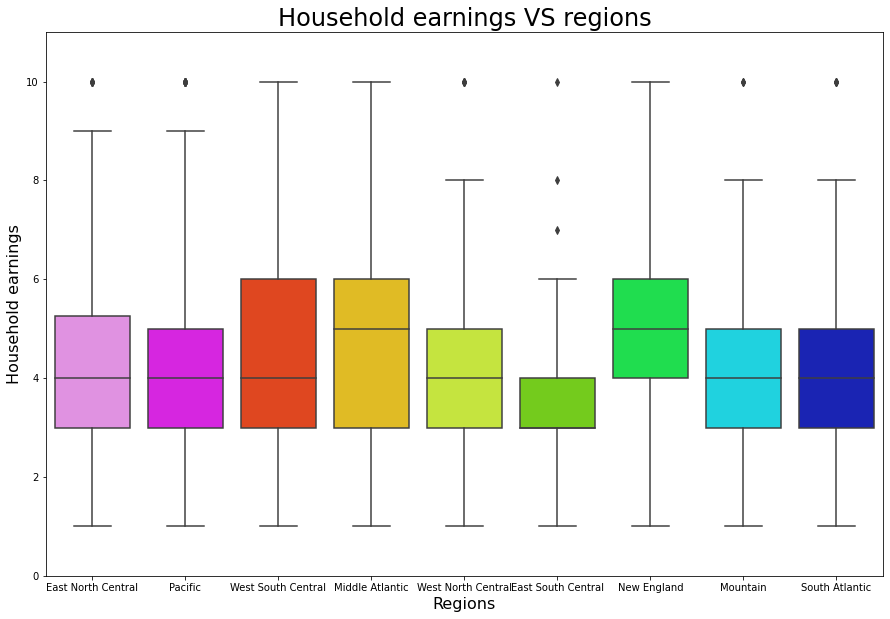

In [256]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'US Region', y = 'How much total combined money did all members of your HOUSEHOLD earn last year?', data = data_set, palette="gist_ncar_r", whis =2)
plt.xlabel("Regions", size=16)
plt.ylabel("Household earnings", size=16)
plt.title("Household earnings VS regions", size=24)
plt.ylim(0, 11,10)

## Final conclusion : 
### We can see that the household earnings are pretty much the same across the US regions.
### To our surprise, the money is not the reason for the people to stay in the pacific region.
### So what is it that makes them stay? 
### Maybe it's the love for the place, the beaches or the colture they have there, We can't really tell, choose for yourself...